# K_means

### Setting up
install these libraries

In [1]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

## Bài toán Phân cụm khách hàng

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
# Đọc dữ liệu
df = pd.read_csv('Cust_Segmentation.csv')
df = df.drop(columns=['Customer Id', 'Address'])
df = df.dropna()

features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']
X = df[features]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Khởi tạo tham số và sử dụng thuật toán K-Means
k = 3  
model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = model.fit_predict(X_scaled)

\\?\C:\Users\caoho\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [5]:
print(df.groupby('Cluster')[features].mean())

               Age       Edu  Years Employed     Income  Card Debt  \
Cluster                                                              
0        42.408451  1.483568       15.741784  72.563380   2.730197   
1        30.803714  1.360743        5.177719  29.095491   0.895016   
2        34.145455  3.427273        5.154545  49.963636   1.532209   

         Other Debt  DebtIncomeRatio  
Cluster                               
0          4.992944        11.225822  
1          1.818955         9.635544  
2          3.559036        10.533636  


### Visualizing

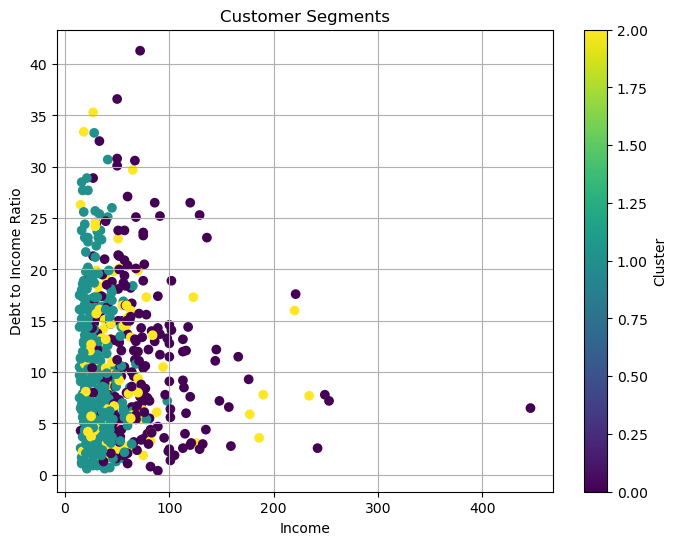

In [6]:
# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['DebtIncomeRatio'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Debt to Income Ratio')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()